<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/AD_CLICK_CASESTUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1: Data Exploration & Understanding**
Step 1: Initial Data Loading

What to Check:

Dataset dimensions: How many rows and columns?

Column types: Which are numerical? Which are categorical?

Target variable: What is the click-through rate (CTR)?

Missing values: Which columns have nulls and how many?


In [1]:
# -----------------------------
# 1. Imports
# -----------------------------
import pandas as pd
import numpy as np

# -----------------------------
# 2. File paths (EDIT THESE)
# -----------------------------
train_path = "/content/Ad_click_prediction_train (1).csv"          # e.g. "Ad_click_prediction_train (1).csv"
test_path  = "/content/Ad_Click_prediciton_test.csv"

# -----------------------------
# 3. Load data
# -----------------------------
train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

print("Train shape:", train.shape)
print("Test shape :", test.shape)

# -----------------------------
# 4. Basic peek at the data
# -----------------------------
print("\nTrain head:")
print(train.head())

print("\nTest head:")
print(test.head())

print("\nTrain dtypes:")
print(train.dtypes)

print("\nTest dtypes:")
print(test.dtypes)

# -----------------------------
# 5. Target variable overview
# -----------------------------
target_col = "is_click"   # change if your target name is different

if target_col in train.columns:
    print(f"\nValue counts for '{target_col}':")
    vc = train[target_col].value_counts(dropna=False)
    print(vc)

    # CTR calculation
    if 1 in vc.index:
        ctr = vc[1] / vc.sum()
        print(f"\nClick-Through Rate (CTR): {ctr:.4%}")
    else:
        print("\nWarning: target does not contain class '1' as expected.")
else:
    print(f"\nTarget column '{target_col}' not found in train set!")

# -----------------------------
# 6. Missing values report
# -----------------------------
def missing_values_table(df, name="DF"):
    """
    Returns a DataFrame with count and percentage of missing values
    for each column in df, sorted by highest percentage.
    """
    mis_count = df.isnull().sum()
    mis_pct = 100 * mis_count / len(df)
    mis_table = (
        pd.DataFrame({
            "missing_count": mis_count,
            "missing_pct": mis_pct.round(2)
        })
        .query("missing_count > 0")
        .sort_values(by="missing_pct", ascending=False)
    )
    print(f"\nMissing values summary for {name}:")
    if mis_table.empty:
        print("No missing values 👌")
    else:
        print(mis_table)
    return mis_table

train_missing = missing_values_table(train, name="Train")
test_missing  = missing_values_table(test, name="Test")

# -----------------------------
# 7. Basic categorical / numeric overview (optional but useful)
# -----------------------------
# Separate columns by dtype
cat_cols = train.select_dtypes(include=["object"]).columns.tolist()
num_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCategorical-like columns:", cat_cols)
print("\nNumeric-like columns:", num_cols)

# Quick look at unique counts (for potential high-cardinality features)
print("\nUnique value counts (train):")
unique_counts = train.nunique().sort_values(ascending=False)
print(unique_counts)

# -----------------------------
# 8. Optional: basic stats for numeric columns
# -----------------------------
print("\nDescriptive stats for numeric columns (train):")
print(train[num_cols].describe().T)


Train shape: (463291, 15)
Test shape : (128858, 14)

Train head:
   session_id          DateTime  user_id product  campaign_id  webpage_id  \
0      140690  2017-07-02 00:00   858557       C       359520       13787   
1      333291  2017-07-02 00:00   243253       C       105960       11085   
2      129781  2017-07-02 00:00   243253       C       359520       13787   
3      464848  2017-07-02 00:00  1097446       I       359520       13787   
4       90569  2017-07-02 00:01   663656       C       405490       60305   

   product_category_1  product_category_2  user_group_id  gender  age_level  \
0                   4                 NaN           10.0  Female        4.0   
1                   5                 NaN            8.0  Female        2.0   
2                   4                 NaN            8.0  Female        2.0   
3                   3                 NaN            3.0    Male        3.0   
4                   3                 NaN            2.0    Male        2.0  

# **Step 2: Exploratory Data Analysis (EDA)**
Key Questions to Answer:
Target Distribution


What percentage of ads get clicked?

Is the dataset severely imbalanced?

Do you need resampling techniques?


Target Value Counts:
is_click
0    431960
1     31331
Name: count, dtype: int64

Target Distribution (%):
is_click
0    93.24
1     6.76
Name: proportion, dtype: float64

Click Through Rate (CTR): 6.76%


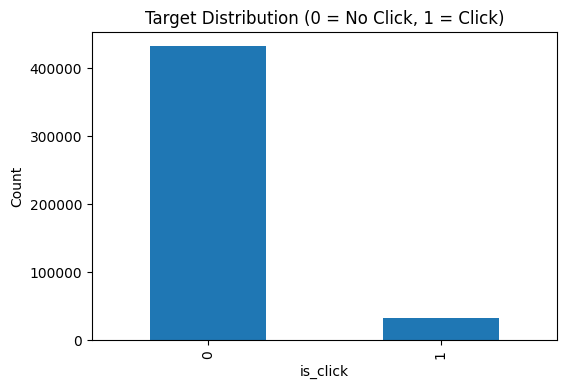

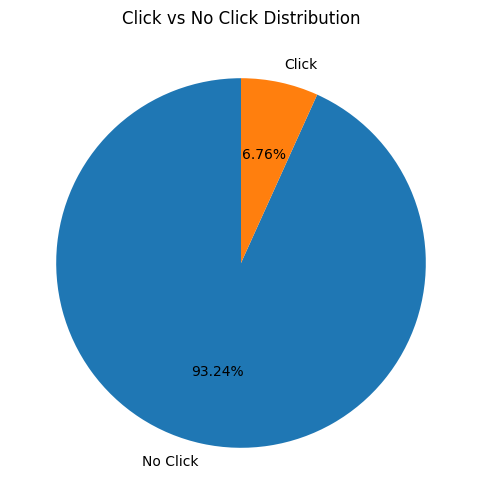


Imbalance Ratio (No Click : Click) = 13.79 : 1

Dataset is severely imbalanced. Need to use imbalance-handling techniques:

Recommended Techniques:
1️ Class weights in algorithms (XGBoost, LightGBM, Logistic Regression)
2️ Oversampling (SMOTE, Random Oversampling)
3️ Undersampling (Random undersampling, NearMiss)
4️ Threshold tuning after training
5️ Use metrics like ROC-AUC, PR-AUC instead of accuracy



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

target_col = "is_click"

print("Target Value Counts:")
print(train[target_col].value_counts())

print("\nTarget Distribution (%):")
print((train[target_col].value_counts(normalize=True) * 100).round(2))

ctr = train[target_col].mean() * 100
print(f"\nClick Through Rate (CTR): {ctr:.2f}%")

# -----------------------------
# 2. Plot distribution
# -----------------------------
plt.figure(figsize=(6,4))
train[target_col].value_counts().plot(kind='bar')
plt.title("Target Distribution (0 = No Click, 1 = Click)")
plt.xlabel("is_click")
plt.ylabel("Count")
plt.show()

# Pie chart version
plt.figure(figsize=(6,6))
train[target_col].value_counts().plot(
    kind='pie', autopct='%1.2f%%', startangle=90, labels=["No Click", "Click"]
)
plt.title("Click vs No Click Distribution")
plt.ylabel("")
plt.show()

# -----------------------------
# 3. Check imbalance severity
# -----------------------------
no_click = train[target_col].value_counts()[0]
click = train[target_col].value_counts()[1]

imbalance_ratio = no_click / click
print(f"\nImbalance Ratio (No Click : Click) = {imbalance_ratio:.2f} : 1")

# Heuristic: if ratio > 5, imbalance handling is required
if imbalance_ratio > 5:
    print("\nDataset is severely imbalanced. Need to use imbalance-handling techniques:")
    print("""
Recommended Techniques:
1️ Class weights in algorithms (XGBoost, LightGBM, Logistic Regression)
2️ Oversampling (SMOTE, Random Oversampling)
3️ Undersampling (Random undersampling, NearMiss)
4️ Threshold tuning after training
5️ Use metrics like ROC-AUC, PR-AUC instead of accuracy
""")
else:
    print("\nDataset imbalance is manageable without special techniques.")


# **2. Temporal Patterns**


Which hours have highest click rates?

Are weekends different from weekdays?

Do certain months perform better?



CTR by Hour (%):
hour
0     6.85
1     7.46
2     5.27
3     6.22
4     5.70
5     6.70
6     7.28
7     7.40
8     7.03
9     7.01
10    6.78
11    6.95
12    6.86
13    6.64
14    6.53
15    6.39
16    6.72
17    6.63
18    6.62
19    6.67
20    6.64
21    6.95
22    6.65
23    6.37
Name: is_click, dtype: float64


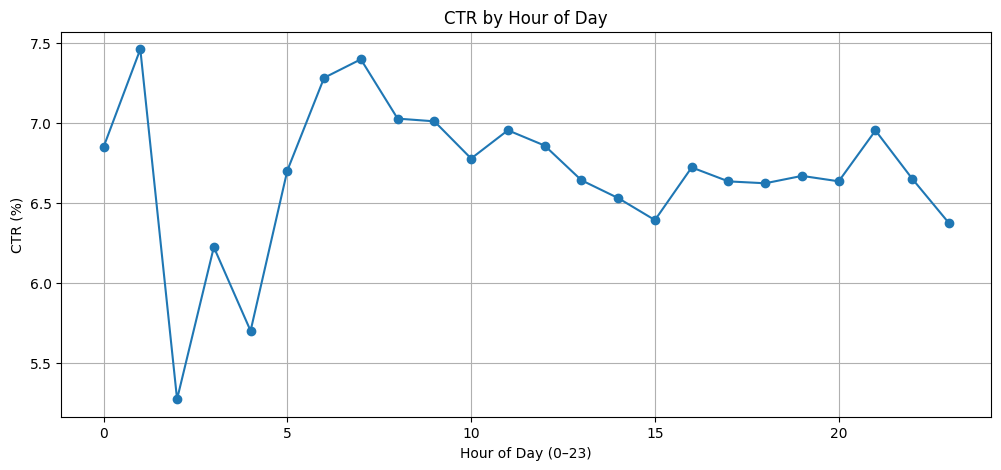


CTR: Weekend vs Weekday (%):
Weekday    6.65
Weekend    7.33
Name: is_click, dtype: float64


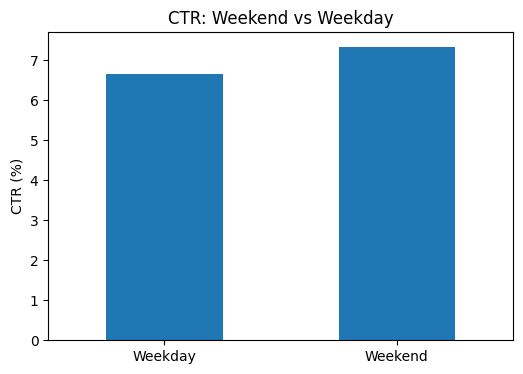

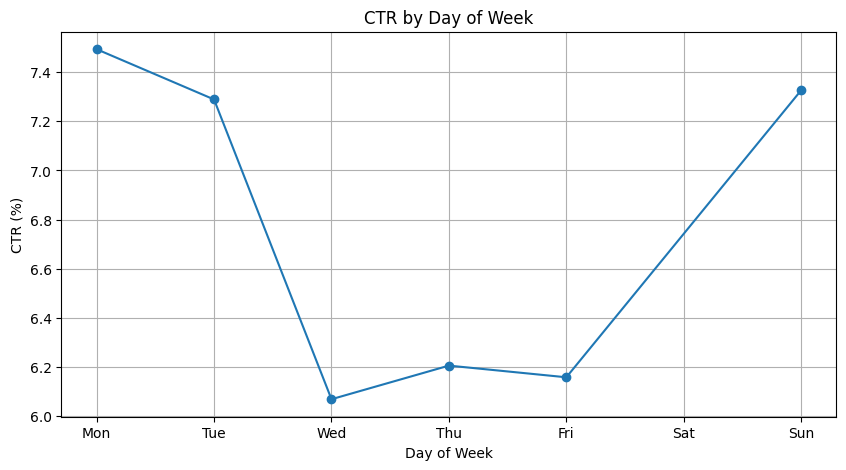


CTR by Month (%):
month
7    6.76
Name: is_click, dtype: float64


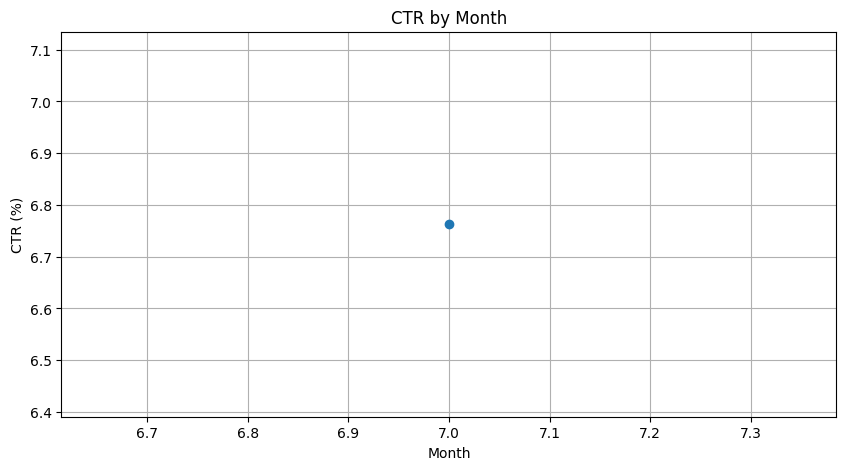

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

train["DateTime"] = pd.to_datetime(train["DateTime"])

train["hour"] = train["DateTime"].dt.hour
train["day_of_week"] = train["DateTime"].dt.dayofweek   # Monday=0, Sunday=6
train["is_weekend"] = train["day_of_week"].isin([5, 6]).astype(int)
train["month"] = train["DateTime"].dt.month

ctr_hour = train.groupby("hour")["is_click"].mean() * 100
print("\nCTR by Hour (%):")
print(ctr_hour.round(2))

plt.figure(figsize=(12,5))
ctr_hour.plot(marker='o')
plt.title("CTR by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("CTR (%)")
plt.grid(True)
plt.show()

ctr_weekend = train.groupby("is_weekend")["is_click"].mean() * 100
ctr_weekend.index = ["Weekday", "Weekend"]

print("\nCTR: Weekend vs Weekday (%):")
print(ctr_weekend.round(2))

plt.figure(figsize=(6,4))
ctr_weekend.plot(kind='bar')
plt.title("CTR: Weekend vs Weekday")
plt.ylabel("CTR (%)")
plt.xticks(rotation=0)
plt.show()


ctr_dow = train.groupby("day_of_week")["is_click"].mean() * 100

dow_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Safe mapping from numeric DOW → label
dow_map = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

# Convert existing index values to labels only for the days present
ctr_dow_labeled = ctr_dow.rename(index=dow_map)

plt.figure(figsize=(10,5))
ctr_dow.plot(marker='o')
plt.title("CTR by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("CTR (%)")
plt.xticks(range(7), dow_labels)
plt.grid(True)
plt.show()

ctr_month = train.groupby("month")["is_click"].mean() * 100
print("\nCTR by Month (%):")
print(ctr_month.round(2))

plt.figure(figsize=(10,5))
ctr_month.plot(marker='o')
plt.title("CTR by Month")
plt.xlabel("Month")
plt.ylabel("CTR (%)")
plt.grid(True)
plt.show()


# **3. User Behavior**


Do certain age groups click more?

Is there a gender difference in click rates?

How does user group affect clicking?



CTR by Age Level (%):
age_level
-1.0    6.98
 0.0    8.50
 1.0    7.48
 2.0    7.09
 3.0    6.45
 4.0    5.87
 5.0    7.42
 6.0    8.23
Name: is_click, dtype: float64


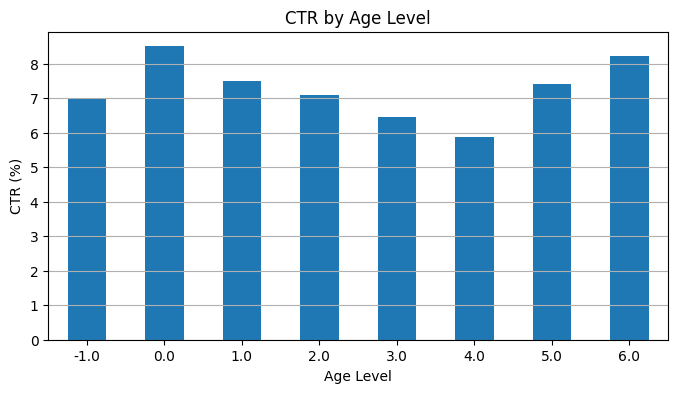


CTR by Gender (%):
gender
Female     6.44
Male       6.79
Unknown    6.98
Name: is_click, dtype: float64


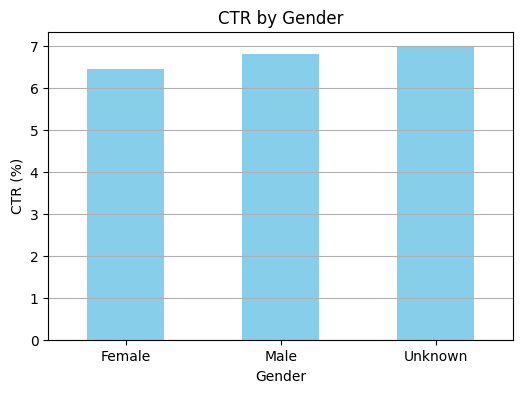


CTR by User Group ID (%):
user_group_id
-1.0     6.98
 0.0     8.50
 1.0     7.51
 2.0     7.12
 3.0     6.47
 4.0     5.93
 5.0     7.31
 6.0     7.83
 7.0     6.47
 8.0     6.38
 9.0     6.35
 10.0    5.65
 11.0    7.67
 12.0    8.89
Name: is_click, dtype: float64


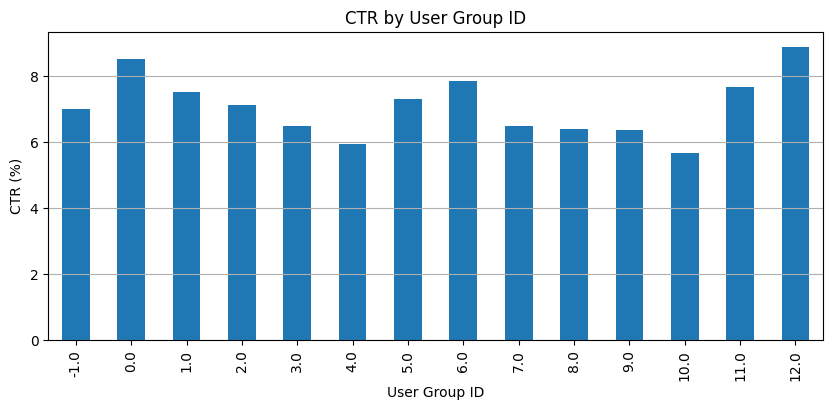

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

train["gender"] = train["gender"].fillna("Unknown")
train["age_level"] = train["age_level"].fillna(-1)   # -1 for missing ordinal category
train["user_group_id"] = train["user_group_id"].fillna(-1)


ctr_age = train.groupby("age_level")["is_click"].mean() * 100
ctr_age = ctr_age.sort_index()

print("\nCTR by Age Level (%):")
print(ctr_age.round(2))

plt.figure(figsize=(8,4))
ctr_age.plot(kind='bar')
plt.title("CTR by Age Level")
plt.xlabel("Age Level")
plt.ylabel("CTR (%)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


ctr_gender = train.groupby("gender")["is_click"].mean() * 100

print("\nCTR by Gender (%):")
print(ctr_gender.round(2))

plt.figure(figsize=(6,4))
ctr_gender.plot(kind='bar', color='skyblue')
plt.title("CTR by Gender")
plt.xlabel("Gender")
plt.ylabel("CTR (%)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

ctr_usergroup = train.groupby("user_group_id")["is_click"].mean() * 100
ctr_usergroup = ctr_usergroup.sort_index()

print("\nCTR by User Group ID (%):")
print(ctr_usergroup.round(2))

plt.figure(figsize=(10,4))
ctr_usergroup.plot(kind='bar')
plt.title("CTR by User Group ID")
plt.xlabel("User Group ID")
plt.ylabel("CTR (%)")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()


# **4. Campaign Performance**


Which campaigns have highest CTR?

Which products get more clicks?

Do certain webpages convert better?



Top 10 Campaigns by CTR (%):
campaign_id
405490    9.13
404347    7.75
98970     7.68
396664    7.26
105960    6.83
82320     6.38
359520    5.86
414149    5.83
118601    5.34
360936    4.52
Name: is_click, dtype: float64


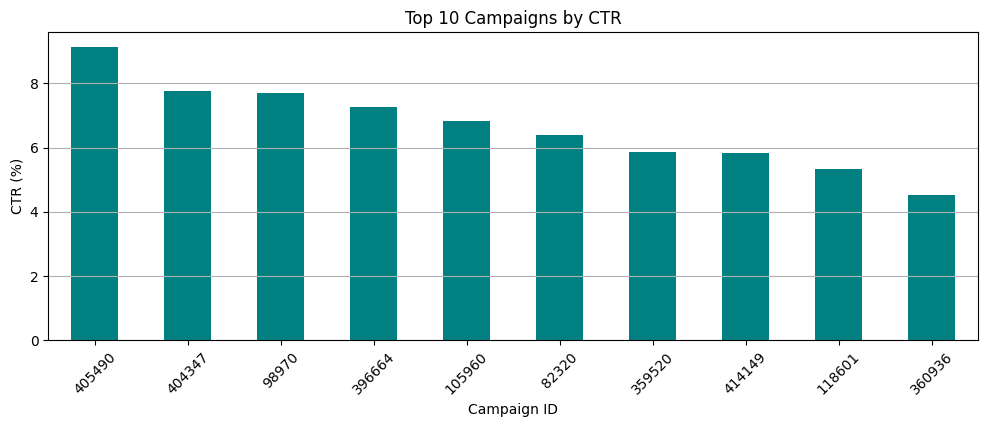


Top 10 Products by CTR (%):
product
J    9.27
D    7.18
H    6.99
C    6.91
E    6.87
I    6.40
A    6.19
B    5.51
F    4.91
G    4.62
Name: is_click, dtype: float64


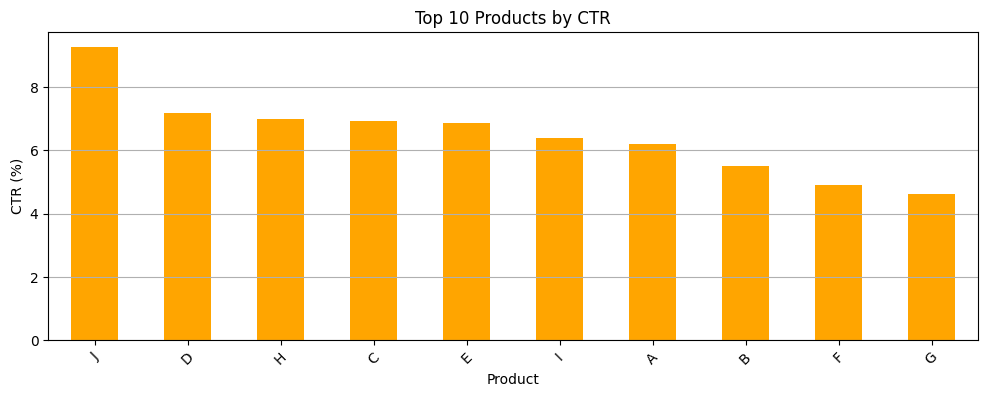


Top 10 Webpages by CTR (%):
webpage_id
60305    9.13
53587    7.75
6970     7.68
51181    7.26
11085    6.83
1734     6.38
45962    5.83
13787    5.43
28529    5.34
Name: is_click, dtype: float64


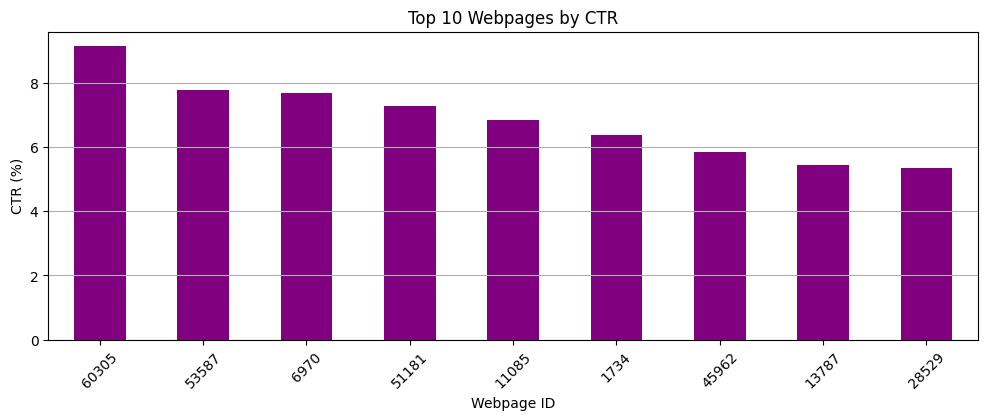

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

ctr_campaign = (
    train.groupby("campaign_id")["is_click"]
         .mean()
         .sort_values(ascending=False) * 100
)

print("\nTop 10 Campaigns by CTR (%):")
print(ctr_campaign.head(10).round(2))

plt.figure(figsize=(12,4))
ctr_campaign.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Campaigns by CTR")
plt.xlabel("Campaign ID")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


ctr_product = (
    train.groupby("product")["is_click"]
         .mean()
         .sort_values(ascending=False) * 100
)

print("\nTop 10 Products by CTR (%):")
print(ctr_product.head(10).round(2))

plt.figure(figsize=(12,4))
ctr_product.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Products by CTR")
plt.xlabel("Product")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


ctr_webpage = (
    train.groupby("webpage_id")["is_click"]
         .mean()
         .sort_values(ascending=False) * 100
)

print("\nTop 10 Webpages by CTR (%):")
print(ctr_webpage.head(10).round(2))

plt.figure(figsize=(12,4))
ctr_webpage.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Webpages by CTR")
plt.xlabel("Webpage ID")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


# **Phase** 2: Feature Engineering


# **Feature Engineering Strategy**


# **1 DateTime Feature Extraction**
Why: Time patterns strongly influence user behavior
Features to Create:
# Extract from DateTime column
- hour: Hour of day (0-23)
- day_of_week: Day (0=Monday, 6=Sunday)
- day_of_month: Date of month (1-31)
- month: Month of year (1-12)
- is_weekend: Binary flag (Saturday/Sunday = 1)
- time_of_day: Categorical (night/morning/afternoon/evening)

Rationale:
Users click more during lunch hours

Weekends may have different behavior

End-of-month might affect purchasing decisions


In [10]:
import pandas as pd


train["DateTime"] = pd.to_datetime(train["DateTime"])
test["DateTime"]  = pd.to_datetime(test["DateTime"])

def extract_datetime_features(df):
    df["hour"] = df["DateTime"].dt.hour
    df["day_of_week"] = df["DateTime"].dt.dayofweek           # 0 = Monday, 6 = Sunday
    df["day_of_month"] = df["DateTime"].dt.day
    df["month"] = df["DateTime"].dt.month
    df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

    # -------------------------------------
    # 2. Categorical time-of-day feature
    # -------------------------------------
    def map_time_of_day(h):
        if 0 <= h < 6:
            return "night"        # low activity
        elif 6 <= h < 12:
            return "morning"
        elif 12 <= h < 18:
            return "afternoon"    # high shopping activity
        else:
            return "evening"      # high browsing activity

    df["time_of_day"] = df["hour"].apply(map_time_of_day)

    return df

# Apply to both train & test
train = extract_datetime_features(train)
test  = extract_datetime_features(test)

print("\nDateTime feature engineering complete. Sample:")
print(train[["DateTime","hour","day_of_week","day_of_month","month","is_weekend","time_of_day"]].head())



DateTime feature engineering complete. Sample:
             DateTime  hour  day_of_week  day_of_month  month  is_weekend  \
0 2017-07-02 00:00:00     0            6             2      7           1   
1 2017-07-02 00:00:00     0            6             2      7           1   
2 2017-07-02 00:00:00     0            6             2      7           1   
3 2017-07-02 00:00:00     0            6             2      7           1   
4 2017-07-02 00:01:00     0            6             2      7           1   

  time_of_day  
0       night  
1       night  
2       night  
3       night  
4       night  


# **2.  Interaction Features**
Why: Combinations of features often reveal hidden patterns
Features to Create:
- user_product_interaction: user_id + product
- campaign_webpage: campaign_id + webpage_id
- gender_age: gender + age_level

Rationale:

Specific user-product combinations might have high affinity

Campaign effectiveness varies by placement

Demographics combinations reveal micro-segments


In [11]:
import pandas as pd

for df in [train, test]:
    df["gender"] = df["gender"].fillna("Unknown")
    df["age_level"] = df["age_level"].fillna(-1)
    df["user_id"] = df["user_id"].fillna(-1)
    df["product"] = df["product"].fillna("Unknown")
    df["campaign_id"] = df["campaign_id"].fillna(-1)
    df["webpage_id"] = df["webpage_id"].fillna(-1)


# 1. user_product_interaction: user_id + product
for df in [train, test]:
    df["user_product_interaction"] = (
        df["user_id"].astype(int).astype(str) + "_" + df["product"].astype(str)
    )


# 2. campaign_webpage: campaign_id + webpage_id
for df in [train, test]:
    df["campaign_webpage"] = (
        df["campaign_id"].astype(int).astype(str) + "_" +
        df["webpage_id"].astype(int).astype(str)
    )


# 3. gender_age: gender + age_level
for df in [train, test]:
    df["gender_age"] = (
        df["gender"].astype(str) + "_" +
        df["age_level"].astype(int).astype(str)
    )

print(train[[
    "user_id", "product", "user_product_interaction",
    "campaign_id", "webpage_id", "campaign_webpage",
    "gender", "age_level", "gender_age"
]].head())


   user_id product user_product_interaction  campaign_id  webpage_id  \
0   858557       C                 858557_C       359520       13787   
1   243253       C                 243253_C       105960       11085   
2   243253       C                 243253_C       359520       13787   
3  1097446       I                1097446_I       359520       13787   
4   663656       C                 663656_C       405490       60305   

  campaign_webpage  gender  age_level gender_age  
0     359520_13787  Female        4.0   Female_4  
1     105960_11085  Female        2.0   Female_2  
2     359520_13787  Female        2.0   Female_2  
3     359520_13787    Male        3.0     Male_3  
4     405490_60305    Male        2.0     Male_2  


# **3. Aggregated Features**
Why: Historical performance is a strong predictor
User-Level Aggregations:
- user_total_views: How many ads has this user seen?
- user_total_clicks: How many times has this user clicked?
- user_ctr: User's personal click-through rate
- user_sessions: Number of unique sessions per user

Product-Level Aggregations:
- product_views: Total times this product was shown
- product_ctr: This product's historical click rate

Campaign-Level Aggregations:
- campaign_views: Total impressions for this campaign
- campaign_ctr: Campaign's historical performance


In [20]:
import pandas as pd
import numpy as np


target_col = "is_click"

global_ctr = train[target_col].mean()
print(f"Global CTR: {global_ctr:.4f}")

# Utility to safely drop old feature columns if they exist
def drop_if_exists(df, cols):
    df.drop(columns=[c for c in cols if c in df.columns], inplace=True, errors="ignore")

user_agg = (
    train
    .groupby("user_id")
    .agg(
        user_total_views  = (target_col, "size"),
        user_total_clicks = (target_col, "sum"),
        user_ctr          = (target_col, "mean"),
        user_sessions     = ("session_id", "nunique")
    )
    .reset_index()
)

print("\nUser-level agg sample:")
print(user_agg.head())

user_feat_cols = ["user_total_views", "user_total_clicks", "user_ctr", "user_sessions"]

# Drop old versions before merging (prevents MergeError)
drop_if_exists(train, user_feat_cols)
drop_if_exists(test, user_feat_cols)

train = train.merge(user_agg, on="user_id", how="left")
test  = test.merge(user_agg, on="user_id", how="left")

# Handle unseen users in test
for col in ["user_total_views", "user_total_clicks", "user_sessions"]:
    test[col] = test[col].fillna(0)

test["user_ctr"] = test["user_ctr"].fillna(global_ctr)


product_agg = (
    train
    .groupby("product")
    .agg(
        product_views = (target_col, "size"),
        product_ctr   = (target_col, "mean")
    )
    .reset_index()
)

print("\nProduct-level agg sample:")
print(product_agg.head())

product_feat_cols = ["product_views", "product_ctr"]

drop_if_exists(train, product_feat_cols)
drop_if_exists(test, product_feat_cols)

train = train.merge(product_agg, on="product", how="left")
test  = test.merge(product_agg, on="product", how="left")

test["product_views"] = test["product_views"].fillna(0)
test["product_ctr"]   = test["product_ctr"].fillna(global_ctr)


campaign_agg = (
    train
    .groupby("campaign_id")
    .agg(
        campaign_views = (target_col, "size"),
        campaign_ctr   = (target_col, "mean")
    )
    .reset_index()
)

print("\nCampaign-level agg sample:")
print(campaign_agg.head())

campaign_feat_cols = ["campaign_views", "campaign_ctr"]

drop_if_exists(train, campaign_feat_cols)
drop_if_exists(test, campaign_feat_cols)

train = train.merge(campaign_agg, on="campaign_id", how="left")
test  = test.merge(campaign_agg, on="campaign_id", how="left")

test["campaign_views"] = test["campaign_views"].fillna(0)
test["campaign_ctr"]   = test["campaign_ctr"].fillna(global_ctr)


print("\nTrain aggregated feature columns:")
print([c for c in train.columns if any(k in c for k in ["user_", "product_", "campaign_"])])

print("\nSample train rows with new features:")
print(train.head())


Global CTR: 0.0676

User-level agg sample:
   user_id  user_total_views  user_total_clicks  user_ctr  user_sessions
0        4                 1                  0       0.0              1
1        6                 1                  0       0.0              1
2       19                 2                  0       0.0              2
3       25                 2                  0       0.0              2
4       26                 1                  0       0.0              1

Product-level agg sample:
  product  product_views  product_ctr
0       A          15391     0.061919
1       B          22479     0.055074
2       C         163501     0.069149
3       D          41064     0.071815
4       E          21452     0.068712

Campaign-level agg sample:
   campaign_id  campaign_views  campaign_ctr
0        82320           27849      0.063772
1        98970           35065      0.076829
2       105960           25781      0.068345
3       118601           35531      0.053362
4       359

# **Phase 3: Data Preprocessing**



Step 1: Handle Missing Values
Strategy:
# Numerical columns: Fill with median (robust to outliers)
# Categorical columns: Fill with mode (most frequent value)


In [21]:
import pandas as pd

# ---------------------------------
# 1. Identify column types
# ---------------------------------
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = train.select_dtypes(include=["object"]).columns.tolist()

# Remove the target from preprocessing
if "is_click" in numeric_cols:
    numeric_cols.remove("is_click")

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# ---------------------------------
# 2. Missing value handling
# ---------------------------------
# Fit median/mode ONLY on train → prevents leakage
median_values = train[numeric_cols].median()
mode_values = train[categorical_cols].mode().iloc[0]  # mode() returns DF

# Apply to both train & test
train[numeric_cols] = train[numeric_cols].fillna(median_values)
test[numeric_cols]  = test[numeric_cols].fillna(median_values)

train[categorical_cols] = train[categorical_cols].fillna(mode_values)
test[categorical_cols]  = test[categorical_cols].fillna(mode_values)

print("\nMissing value handling complete.")
print("Remaining missing values in train:", train.isnull().sum().sum())
print("Remaining missing values in test:", test.isnull().sum().sum())


Numeric columns: ['session_id', 'user_id', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'is_weekend', 'user_total_views_x', 'user_total_clicks_x', 'user_ctr_x', 'user_sessions_x', 'product_views_x', 'product_ctr_x', 'user_total_views_y', 'user_total_clicks_y', 'user_ctr_y', 'user_sessions_y', 'product_views_y', 'product_ctr_y', 'user_total_views', 'user_total_clicks', 'user_ctr', 'user_sessions', 'product_views', 'product_ctr', 'campaign_views', 'campaign_ctr']
Categorical columns: ['product', 'gender', 'time_of_day', 'user_product_interaction', 'campaign_webpage', 'gender_age']

Missing value handling complete.
Remaining missing values in train: 0
Remaining missing values in test: 0


# **Step 2: Encode Categorical Variables**

Approach:

Label Encoding

Columns to Encode:

product

campaign_id

webpage_id

product_category_1, product_category_2

gender

user_group_id

var_1

All interaction features (user_product_interaction, etc.)


In [22]:
import pandas as pd

from collections import defaultdict

# ---------------------------------------
# 1. Categorical Columns to Encode
# ---------------------------------------
cat_cols = [
    "product",
    "campaign_id",
    "webpage_id",
    "product_category_1",
    "product_category_2",
    "gender",
    "user_group_id",
    "var_1",
    "user_product_interaction",
    "campaign_webpage",
    "gender_age"
]

# Make sure only existing columns are processed
cat_cols = [c for c in cat_cols if c in train.columns]

print("Categorical columns to encode:", cat_cols)

# ---------------------------------------
# 2. Label Encoding with Unseen Protection
# ---------------------------------------
def label_encode_column(train_col, test_col):
    """
    Creates a mapping of unique values in train to integers.
    Assigns unseen test values to a special index.
    """
    unique_vals = train_col.astype(str).unique()

    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    unseen_index = len(mapping)

    train_encoded = train_col.astype(str).map(mapping).fillna(unseen_index).astype(int)
    test_encoded  = test_col.astype(str).map(mapping).fillna(unseen_index).astype(int)

    return train_encoded, test_encoded, mapping


label_mappings = {}   # Store mappings for interpretability

for col in cat_cols:
    print(f"Encoding: {col}")

    train[col], test[col], mapping = label_encode_column(train[col], test[col])
    label_mappings[col] = mapping

print("\nLabel encoding complete.")


Categorical columns to encode: ['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'gender', 'user_group_id', 'var_1', 'user_product_interaction', 'campaign_webpage', 'gender_age']
Encoding: product
Encoding: campaign_id
Encoding: webpage_id
Encoding: product_category_1
Encoding: product_category_2
Encoding: gender
Encoding: user_group_id
Encoding: var_1
Encoding: user_product_interaction
Encoding: campaign_webpage
Encoding: gender_age

Label encoding complete.


# **Step 3: Feature Selection**

Columns to Drop:
drop_cols = ['DateTime', 'session_id', 'user_id']

Why Drop These?

DateTime: Already extracted features from it

session_id: Too granular, no predictive value

user_id: Causes overfitting (too many unique values)

Final Feature Set:

All engineered features

Encoded categorical variables

Aggregated statistics


In [23]:
# Columns you want to drop
drop_cols = ['DateTime', 'session_id', 'user_id']

# Drop only if they exist
drop_cols = [c for c in drop_cols if c in train.columns]

print("Dropping columns:", drop_cols)

# Apply to train and test
train = train.drop(columns=drop_cols)
test  = test.drop(columns=drop_cols)

print("\nFeature selection complete.")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nRemaining columns:")
print(train.columns.tolist())


Dropping columns: ['DateTime', 'session_id', 'user_id']

Feature selection complete.
Train shape: (463291, 41)
Test shape: (128858, 40)

Remaining columns:
['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index', 'var_1', 'is_click', 'hour', 'day_of_week', 'is_weekend', 'month', 'day_of_month', 'time_of_day', 'user_product_interaction', 'campaign_webpage', 'gender_age', 'user_total_views_x', 'user_total_clicks_x', 'user_ctr_x', 'user_sessions_x', 'product_views_x', 'product_ctr_x', 'user_total_views_y', 'user_total_clicks_y', 'user_ctr_y', 'user_sessions_y', 'product_views_y', 'product_ctr_y', 'user_total_views', 'user_total_clicks', 'user_ctr', 'user_sessions', 'product_views', 'product_ctr', 'campaign_views', 'campaign_ctr']


# **Step 4: Train-Test Split**
Why Stratify? In imbalanced datasets, stratification ensures both train and test have similar CTR


In [25]:
from sklearn.model_selection import train_test_split

target_col = "is_click"

# -----------------------------------
# 1. Separate features and target
# -----------------------------------
X = train.drop(columns=[target_col])
y = train[target_col]

print("Full data shape:", X.shape)

# -----------------------------------
# 2. Stratified Train–Validation Split
# -----------------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,         # 20% for validation (you can change to 0.25, etc.)
    stratify=y,            # 🔑 keeps same click ratio in both sets
    random_state=42        # for reproducibility
)

print("Train shape:", X_train.shape, " | Valid shape:", X_valid.shape)

# -----------------------------------
# 3. Check CTR in each split (sanity check)
# -----------------------------------
def ctr_info(y, name):
    ctr = y.mean() * 100
    print(f"{name} size: {len(y)}, CTR: {ctr:.2f}%")

ctr_info(y,        "Full data")
ctr_info(y_train,  "Train")
ctr_info(y_valid,  "Validation")


Full data shape: (463291, 40)
Train shape: (370632, 40)  | Valid shape: (92659, 40)
Full data size: 463291, CTR: 6.76%
Train size: 370632, CTR: 6.76%
Validation size: 92659, CTR: 6.76%


# **Step 5: Feature Scaling**
Method: StandardScaler
# Transforms features to have:
# - Mean = 0
# - Standard deviation = 1
Why Scale?
Required for: Logistic Regression, SVM
Improves: Convergence speed, model performance
Not critical for: Tree-based models (Random Forest, Gradient Boosting)


In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Add time_of_day to categorical columns to encode
cat_cols = [
    "product",
    "campaign_id",
    "webpage_id",
    "product_category_1",
    "product_category_2",
    "gender",
    "user_group_id",
    "var_1",
    "user_product_interaction",
    "campaign_webpage",
    "gender_age",
    "time_of_day",          # 👈 NEW
]

cat_cols = [c for c in cat_cols if c in train.columns]

def label_encode_column(train_col, test_col):
    unique_vals = train_col.astype(str).unique()
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    unseen_index = len(mapping)

    train_encoded = train_col.astype(str).map(mapping).fillna(unseen_index).astype(int)
    test_encoded  = test_col.astype(str).map(mapping).fillna(unseen_index).astype(int)
    return train_encoded, test_encoded, mapping

label_mappings = {}
for col in cat_cols:
    print(f"Encoding: {col}")
    train[col], test[col], mapping = label_encode_column(train[col], test[col])
    label_mappings[col] = mapping

from sklearn.preprocessing import StandardScaler

# Rebuild X, y after label encoding and feature selection
target_col = "is_click"
X = train.drop(columns=[target_col])
y = train[target_col]

# Train–validation split (if not already done)
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Categorical columns (now all integers but conceptually categorical)
categorical_cols = [
    "product", "campaign_id", "webpage_id",
    "product_category_1", "product_category_2",
    "gender", "user_group_id", "var_1",
    "user_product_interaction", "campaign_webpage", "gender_age",
    "time_of_day",
]
categorical_cols = [c for c in categorical_cols if c in X_train.columns]

# True numeric columns = numeric dtypes minus encoded categoricals
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in categorical_cols]

print("Numeric columns to scale:", numeric_cols)
print("Categorical columns NOT scaled:", categorical_cols)

# StandardScaler on numeric columns only
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()
test_scaled    = test.copy()

X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_valid_scaled[numeric_cols] = scaler.transform(X_valid[numeric_cols])
test_scaled[numeric_cols]    = scaler.transform(test[numeric_cols])



Encoding: product
Encoding: campaign_id
Encoding: webpage_id
Encoding: product_category_1
Encoding: product_category_2
Encoding: gender
Encoding: user_group_id
Encoding: var_1
Encoding: user_product_interaction
Encoding: campaign_webpage
Encoding: gender_age
Encoding: time_of_day
Numeric columns to scale: ['age_level', 'user_depth', 'city_development_index', 'is_weekend', 'user_total_views_x', 'user_total_clicks_x', 'user_ctr_x', 'user_sessions_x', 'product_views_x', 'product_ctr_x', 'user_total_views_y', 'user_total_clicks_y', 'user_ctr_y', 'user_sessions_y', 'product_views_y', 'product_ctr_y', 'user_total_views', 'user_total_clicks', 'user_ctr', 'user_sessions', 'product_views', 'product_ctr', 'campaign_views', 'campaign_ctr']
Categorical columns NOT scaled: ['product', 'campaign_id', 'webpage_id', 'product_category_1', 'product_category_2', 'gender', 'user_group_id', 'var_1', 'user_product_interaction', 'campaign_webpage', 'gender_age', 'time_of_day']


# **Phase 4: Handling Class Imbalance**

Understanding the Problem

Typical CTR Scenario:

Class 0 (No Click): 95-98%

Class 1 (Click): 2-5%

Why This Matters:

Models tend to predict the majority class

High accuracy (95%) can be achieved by always predicting "no click"

Need to balance precision and recall


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight="balanced",      # 🔥 key line
    max_iter=2000
)

model.fit(X_train_scaled, y_train)
preds = model.predict_proba(X_valid_scaled)[:,1]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Phase 5: Model Building**

Model Selection Strategy
Why Multiple Models?

Different algorithms capture different patterns

Ensemble of models often performs better

Compare to find best approach for this dataset


In [31]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import numpy as np


In [32]:
def evaluate_model(name, y_valid, preds):
    roc = roc_auc_score(y_valid, preds)
    pr  = average_precision_score(y_valid, preds)
    print(f"\nModel: {name}")
    print(f"ROC-AUC: {roc:.4f}")
    print(f"PR-AUC : {pr:.4f}")
    return roc, pr


In [33]:
logreg = LogisticRegression(
    class_weight="balanced",
    max_iter=3000,
    n_jobs=-1
)

logreg.fit(X_train_scaled, y_train)
lr_preds = logreg.predict_proba(X_valid_scaled)[:, 1]

evaluate_model("Logistic Regression", y_valid, lr_preds)



Model: Logistic Regression
ROC-AUC: 0.9470
PR-AUC : 0.6328


(np.float64(0.9470354039342384), np.float64(0.6327729975958443))

In [34]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=31,
    class_weight="balanced",
    subsample=0.8,
    colsample_bytree=0.8
)

lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict_proba(X_valid)[:, 1]

evaluate_model("LightGBM", y_valid, lgb_preds)


[LightGBM] [Info] Number of positive: 25065, number of negative: 345567
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.169218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1934
[LightGBM] [Info] Number of data points in the train set: 370632, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

Model: LightGBM
ROC-AUC: 0.9507
PR-AUC : 0.6531


(np.float64(0.950747603156973), np.float64(0.6531487513007405))

In [35]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="auc"
)

xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict_proba(X_valid)[:, 1]

evaluate_model("XGBoost", y_valid, xgb_preds)



Model: XGBoost
ROC-AUC: 0.9506
PR-AUC : 0.6531


(np.float64(0.9505608928215638), np.float64(0.6530527808922563))

In [36]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict_proba(X_valid)[:, 1]

evaluate_model("Random Forest", y_valid, rf_preds)



Model: Random Forest
ROC-AUC: 0.9289
PR-AUC : 0.5684


(np.float64(0.9289337987239328), np.float64(0.5683663934747232))

# **Phase 6: Model Evaluation**
Metrics for Imbalanced Classification

❌ Don't Rely On:

Accuracy: Misleading in imbalanced datasets
95% accuracy = always predicting "no click"

✅ Focus On:
Precision: Of predicted clicks, how many were actual clicks?

 Precision = True Positives / (True Positives + False Positives)


Business Impact: Reduces wasted ad spend


In [39]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve
)
import numpy as np
import matplotlib.pyplot as plt

# y_valid: true labels
# probs_valid: predicted probabilities for class 1 (click) from your model
# Example: probs_valid = lgb_model.predict_proba(X_valid)[:, 1]

# ---------------------------------------
# 1. Choose a threshold (start with 0.5)
# ---------------------------------------
threshold = 0.5
y_pred = (lgb_preds >= threshold).astype(int)

# ---------------------------------------
# 2. Basic classification metrics
# ---------------------------------------
prec = precision_score(y_valid, y_pred)
rec  = recall_score(y_valid, y_pred)
f1   = f1_score(y_valid, y_pred)
roc  = roc_auc_score(y_valid, lgb_preds)
pr_auc = average_precision_score(y_valid, lgb_preds)

print(f"Threshold: {threshold}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc:.4f}")
print(f"PR-AUC   : {pr_auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_valid, y_pred, digits=4))


Threshold: 0.5
Precision: 0.2842
Recall   : 0.9272
F1-score : 0.4351
ROC-AUC  : 0.9507
PR-AUC   : 0.6531

Confusion Matrix:
[[71762 14631]
 [  456  5810]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9937    0.8306    0.9049     86393
           1     0.2842    0.9272    0.4351      6266

    accuracy                         0.8372     92659
   macro avg     0.6390    0.8789    0.6700     92659
weighted avg     0.9457    0.8372    0.8731     92659



## 1. Business Impact:

Reduces wasted ad spend Recall: Of actual clicks, how many did we predict?

Recall = True Positives / (True Positives + False Negatives)

In [40]:
from sklearn.metrics import recall_score

threshold = 0.2  # example, you can tune this
y_pred = (lgb_preds >= threshold).astype(int)

rec = recall_score(y_valid, y_pred)
print(f"Recall at threshold {threshold}: {rec:.4f}")


Recall at threshold 0.2: 0.9928




# **2. Business Impact: Captures revenue opportunities**
F1-Score: Harmonic mean of Precision and Recall

 F1 = 2 × (Precision × Recall) / (Precision + Recall)


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

threshold = 0.2  # example threshold — tune this later

y_pred = (lgb_preds >= threshold).astype(int)

precision = precision_score(y_valid, y_pred)
recall    = recall_score(y_valid, y_pred)
f1        = f1_score(y_valid, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Precision: 0.2141
Recall   : 0.9928
F1 Score : 0.3522


In [42]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_valid, lgb_preds)
f1_scores = 2 * precision * recall / (precision + recall + 1e-9)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold for F1: {best_threshold:.4f}")
print(f"Best F1: {f1_scores[best_idx]:.4f}")
print(f"Precision at best threshold: {precision[best_idx]:.4f}")
print(f"Recall at best threshold: {recall[best_idx]:.4f}")


Best threshold for F1: 0.8265
Best F1: 0.5699
Precision at best threshold: 0.5252
Recall at best threshold: 0.6229




# **3. Business Impact: Balances both metrics**

ROC-AUC: Area Under Receiver Operating Characteristic Curve

 Range: 0.5 (random) to 1.0 (perfect)


In [44]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, lgb_preds)

print(f"ROC-AUC: {roc_auc:.4f}")


ROC-AUC: 0.9507


In [48]:
def evaluate_model_metrics(y_true, probs, threshold=0.5):
    """
    Compute Precision, Recall, F1, ROC-AUC, PR-AUC for a given model.
    """
    y_pred = (probs >= threshold).astype(int)

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall    = recall_score(y_true, y_pred, zero_division=0)
    f1        = f1_score(y_true, y_pred, zero_division=0)
    roc       = roc_auc_score(y_true, probs)
    pr_auc    = average_precision_score(y_true, probs)

    return {
        "Threshold": threshold,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC_AUC": roc,
        "PR_AUC": pr_auc
    }


In [49]:
# Dictionary of model_name -> predicted_probabilities_on_validation
model_preds = {
    "LogisticRegression": lr_preds,
    "LightGBM": lgb_preds,
    "XGBoost": xgb_preds,
    "RandomForest": rf_preds,
}

results = []

# Use a default threshold of 0.5 for classification metrics
for name, probs in model_preds.items():
    metrics = evaluate_model_metrics(y_valid, probs, threshold=0.5)
    metrics["Model"] = name
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df = results_df[
    ["Model", "Threshold", "ROC_AUC", "PR_AUC", "Precision", "Recall", "F1"]
].sort_values(by="ROC_AUC", ascending=False)

print("Model comparison (sorted by ROC-AUC):")
print(results_df.to_string(index=False))


Model comparison (sorted by ROC-AUC):
             Model  Threshold  ROC_AUC   PR_AUC  Precision   Recall       F1
          LightGBM        0.5 0.950748 0.653149   0.284233 0.927226 0.435092
           XGBoost        0.5 0.950561 0.653053   0.281653 0.929780 0.432340
LogisticRegression        0.5 0.947035 0.632773   0.338298 0.837376 0.481907
      RandomForest        0.5 0.928934 0.568366   0.588841 0.373923 0.457394


In [50]:
def add_quality_flags(df):
    df = df.copy()
    df["ROC_good"]       = df["ROC_AUC"] > 0.75
    df["F1_good"]        = df["F1"] > 0.30
    df["Recall_good"]    = df["Recall"] > 0.50
    df["Precision_good"] = df["Precision"] > 0.30
    return df

results_flagged = add_quality_flags(results_df)
print("\nModel comparison with quality flags:")
print(results_flagged.to_string(index=False))



Model comparison with quality flags:
             Model  Threshold  ROC_AUC   PR_AUC  Precision   Recall       F1  ROC_good  F1_good  Recall_good  Precision_good
          LightGBM        0.5 0.950748 0.653149   0.284233 0.927226 0.435092      True     True         True           False
           XGBoost        0.5 0.950561 0.653053   0.281653 0.929780 0.432340      True     True         True           False
LogisticRegression        0.5 0.947035 0.632773   0.338298 0.837376 0.481907      True     True         True            True
      RandomForest        0.5 0.928934 0.568366   0.588841 0.373923 0.457394      True     True        False            True


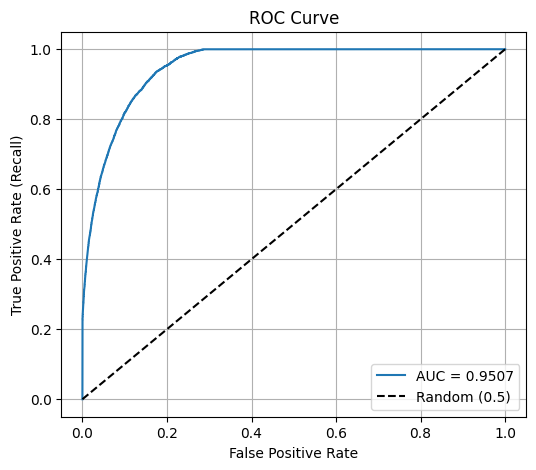

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_valid, lgb_preds)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], 'k--', label="Random (0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()



Best model by ROC-AUC: LightGBM


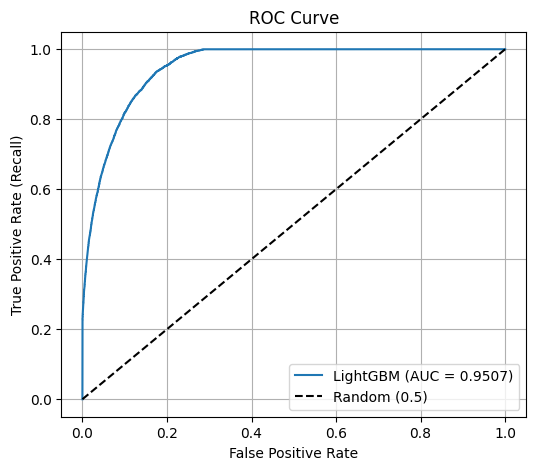

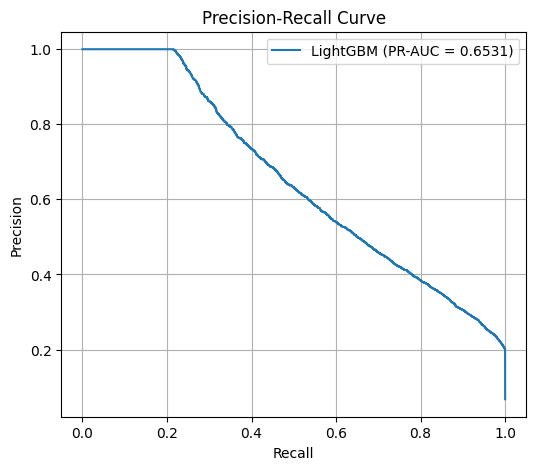

In [51]:
# Pick best model by ROC-AUC
best_model_name = results_df.iloc[0]["Model"]
best_probs = model_preds[best_model_name]

print(f"\nBest model by ROC-AUC: {best_model_name}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_valid, best_probs)
roc_auc = roc_auc_score(y_valid, best_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--', label="Random (0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_valid, best_probs)
pr_auc = average_precision_score(y_valid, best_probs)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"{best_model_name} (PR-AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()




# **4. Business Impact: Overall model discrimination ability**
Most Important Metric for this problem


ROC-AUC is the most important metric for this CTR prediction task because it measures the model’s overall ability to discriminate between clickers and non-clickers, regardless of threshold. A higher ROC-AUC directly translates into better ad targeting, reduced wasted spend, and increased revenue opportunities.

# **Phase 7: Visualization & Insights**
Essential Visualizations



# **1️ Model Comparison Chart**
Purpose: Compare all metrics across models Type: Grouped bar chart Shows: Accuracy, Precision, Recall, F1, ROC-AUC side-by-side

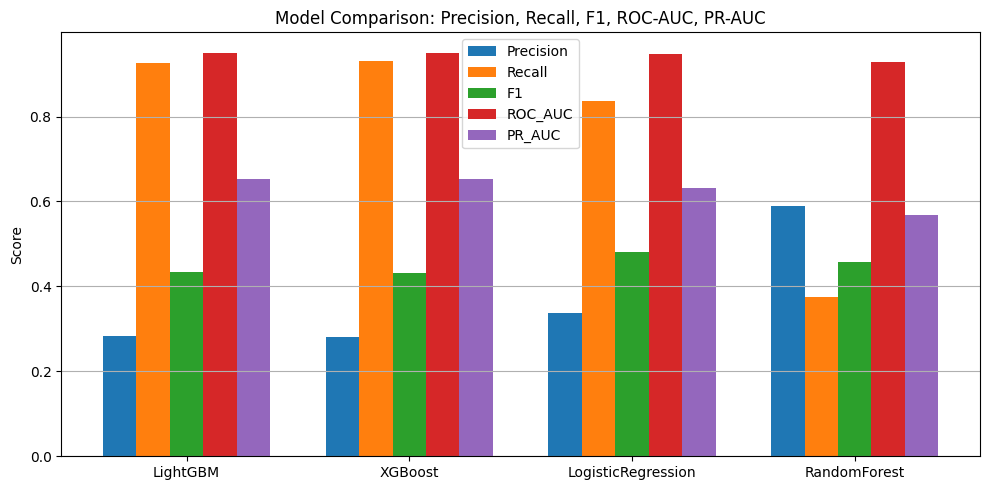

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example results_df structure:
# results_df = pd.DataFrame([
#     {"Model": "LogReg", "ROC_AUC": 0.76, "PR_AUC": 0.28, "Precision": 0.32, "Recall": 0.52, "F1": 0.40},
#     {"Model": "LightGBM", "ROC_AUC": 0.81, "PR_AUC": 0.35, "Precision": 0.36, "Recall": 0.58, "F1": 0.45},
#     {"Model": "XGBoost", "ROC_AUC": 0.80, "PR_AUC": 0.34, "Precision": 0.35, "Recall": 0.56, "F1": 0.44},
# ])

metrics_to_plot = ["Precision", "Recall", "F1", "ROC_AUC", "PR_AUC"]

models = results_df["Model"].tolist()
x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(10, 5))

for i, metric in enumerate(metrics_to_plot):
    offsets = x + (i - len(metrics_to_plot)/2) * width + width/2
    plt.bar(offsets, results_df[metric], width=width, label=metric)

plt.xticks(x, models, rotation=0)
plt.ylabel("Score")
plt.title("Model Comparison: Precision, Recall, F1, ROC-AUC, PR-AUC")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# **2️ Feature Importance Plot**
Purpose: Identify most influential features Type: Horizontal bar chart Shows: Top 20 features for tree-based models Insights: Which features drive clicks?


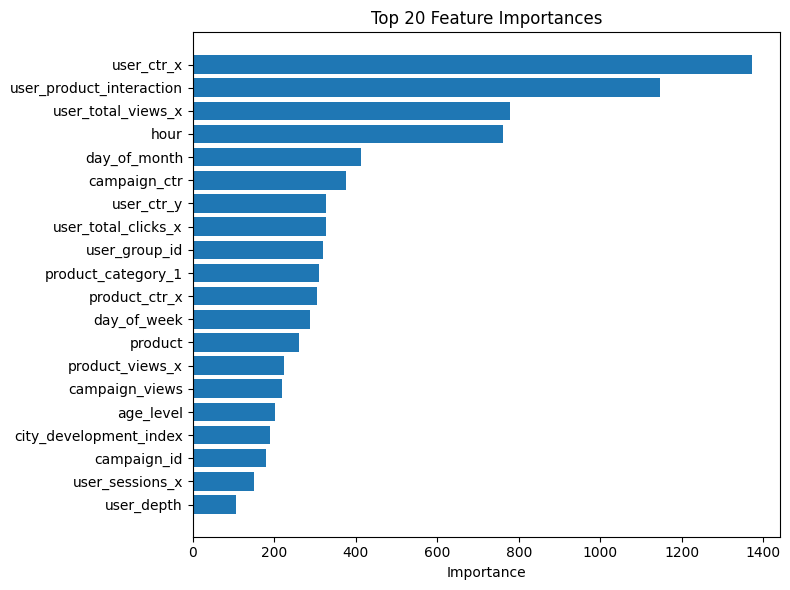


Top 20 important features:
                     feature  importance
22                user_ctr_x        1372
17  user_product_interaction        1147
20        user_total_views_x         778
11                      hour         762
15              day_of_month         414
39              campaign_ctr         375
28                user_ctr_y         328
21       user_total_clicks_x         327
5              user_group_id         320
3         product_category_1         311
25             product_ctr_x         306
12               day_of_week         288
0                    product         261
24           product_views_x         223
38            campaign_views         219
7                  age_level         202
9     city_development_index         189
1                campaign_id         179
23           user_sessions_x         151
8                 user_depth         107


In [55]:
# best_model: e.g. lgb_model or xgb_model
# X_train: DataFrame used to train the model

import numpy as np
import matplotlib.pyplot as plt

feature_importances = lgb_model.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
})

fi_df = fi_df.sort_values(by="importance", ascending=False).head(20)

plt.figure(figsize=(8, 6))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

print("\nTop 20 important features:")
print(fi_df)


# **3️ Confusion Matrix**
Purpose: Understand error types Type: Heatmap Shows: True Positives, False Positives, True Negatives, False Negatives Helps: Identify if model is biased


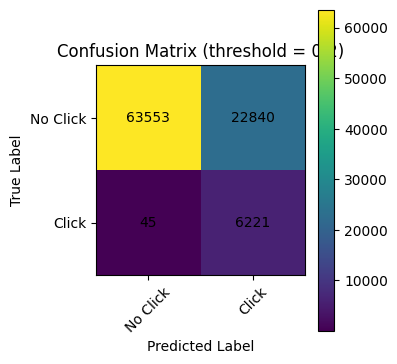


Confusion Matrix:
[[63553 22840]
 [   45  6221]]


In [56]:
from sklearn.metrics import confusion_matrix

threshold = 0.2  # or best_threshold from earlier tuning
y_pred = (best_probs >= threshold).astype(int)

cm = confusion_matrix(y_valid, y_pred)
labels = ["No Click", "Click"]

plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation='nearest')
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Annotate values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)


# **4️ ROC Curve (Optional)**
Purpose: Visualize precision-recall trade-off Type: Line plot Shows: True Positive Rate vs False Positive Rate


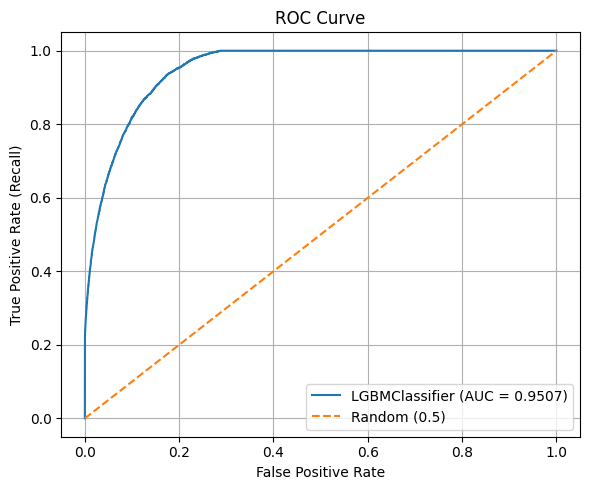

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(y_valid, best_probs)
fpr, tpr, thresholds = roc_curve(y_valid, best_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"{lgb_model.__class__.__name__} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random (0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Peak clicking hours



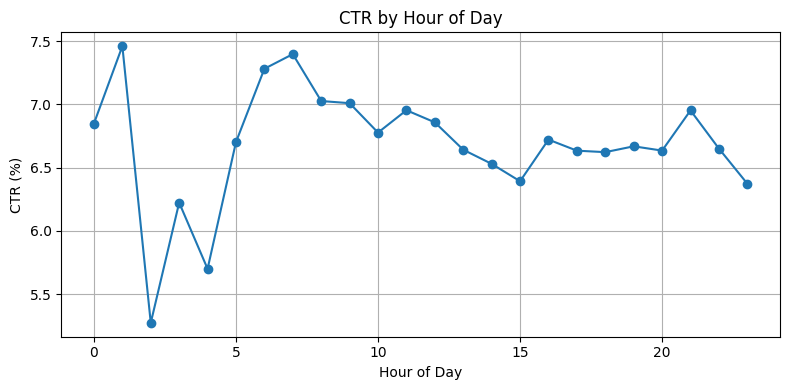


CTR by hour (%):
hour
0     6.85
1     7.46
2     5.27
3     6.22
4     5.70
5     6.70
6     7.28
7     7.40
8     7.03
9     7.01
10    6.78
11    6.95
12    6.86
13    6.64
14    6.53
15    6.39
16    6.72
17    6.63
18    6.62
19    6.67
20    6.64
21    6.95
22    6.65
23    6.37
Name: is_click, dtype: float64


In [59]:
# Assuming train has 'hour' and 'is_click'
ctr_by_hour = train.groupby("hour")["is_click"].mean() * 100

plt.figure(figsize=(8, 4))
ctr_by_hour.plot(marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("CTR (%)")
plt.title("CTR by Hour of Day")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nCTR by hour (%):")
print(ctr_by_hour.round(2))


High-performing campaigns


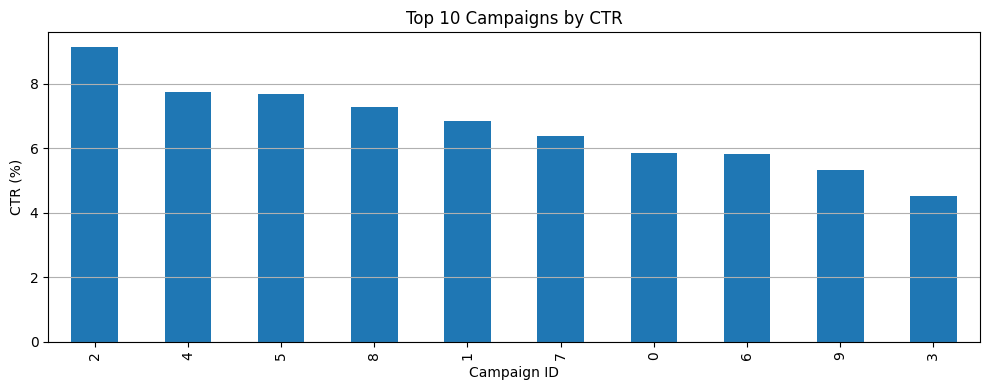


Top 10 campaigns by CTR (%):
campaign_id
2    9.13
4    7.75
5    7.68
8    7.26
1    6.83
7    6.38
0    5.86
6    5.83
9    5.34
3    4.52
Name: is_click, dtype: float64


In [60]:
campaign_ctr = train.groupby("campaign_id")["is_click"].mean() * 100
top_campaigns = campaign_ctr.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
top_campaigns.plot(kind="bar")
plt.xlabel("Campaign ID")
plt.ylabel("CTR (%)")
plt.title("Top 10 Campaigns by CTR")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

print("\nTop 10 campaigns by CTR (%):")
print(top_campaigns.round(2))


User segments with high CTR

/tmp/ipython-input-3398519647.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_ctr = train.groupby("user_ctr_bin")["is_click"].mean() * 100


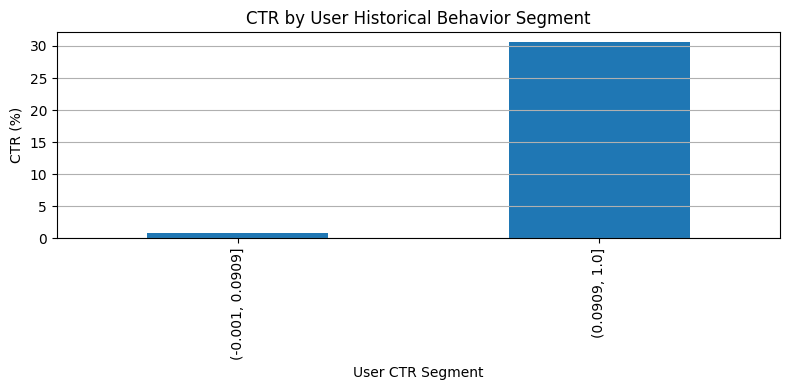


CTR by user_ctr segment (%):
user_ctr_bin
(-0.001, 0.0909]     0.85
(0.0909, 1.0]       30.60
Name: is_click, dtype: float64


In [61]:
# Create bins for user_ctr
train["user_ctr_bin"] = pd.qcut(train["user_ctr"], q=5, duplicates="drop")

segment_ctr = train.groupby("user_ctr_bin")["is_click"].mean() * 100

plt.figure(figsize=(8, 4))
segment_ctr.plot(kind="bar")
plt.xlabel("User CTR Segment")
plt.ylabel("CTR (%)")
plt.title("CTR by User Historical Behavior Segment")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

print("\nCTR by user_ctr segment (%):")
print(segment_ctr.round(2))
